### Simplical Shifting

In [1]:
import os

# set the current working directory
curr_path = os.getcwd().split("/")[:-1]
curr_path = "/".join(curr_path)
os.chdir(curr_path)

In [2]:
from sclibrary import read_csv, get_coordinates, SCPlot
from matplotlib import pyplot as plt

data_folder = 'data/paper_data'

# read csv
filename = data_folder + '/edges.csv'
delimeter = " "
src_col = 'Source'
dest_col = 'Target'
feature_cols = ['Distance']

G = read_csv(filename=filename, delimeter=delimeter, src_col=src_col, dest_col=dest_col, feature_cols=feature_cols)
sc = G.to_simplicial_complex(condition="distance", dist_col_name="Distance", dist_threshold=1.5)

# if coordinates exist
filename = data_folder + '/coordinates.csv'
coordinates = get_coordinates(filename=filename, 
                                            node_id_col="Id", 
                                            x_col='X', 
                                            y_col='Y', 
                                            delimeter=" ")
# create a plot
scplot = SCPlot(sc, coordinates)

/Users/irtaza.hashmi@futurice.com/Desktop/Thesis/sc-graph-library/sclibrary/plot/plot.py:187: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


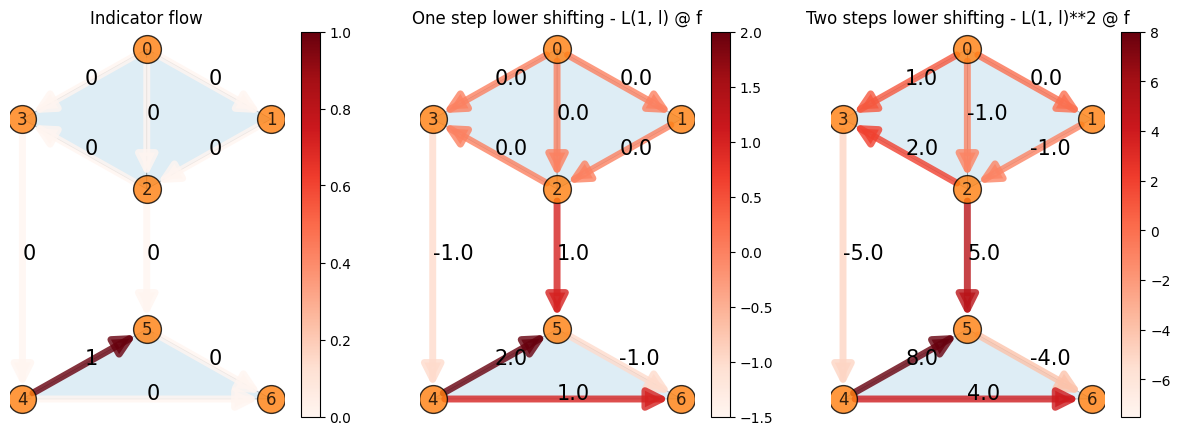

In [8]:
synthetic_flow = [0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
fig = plt.figure(figsize = (15,5))

# indicator flow f
ax = fig.add_subplot(1, 3, 1)
ax.set_title("Indicator flow")
scplot.draw_network(edge_flow=synthetic_flow, ax=ax)

# one step lower shifting
ax = fig.add_subplot(1, 3, 2)
ax.set_title("One step lower shifting - L(1, l) @ f")
flow = sc.apply_lower_shifting(synthetic_flow, steps=1)
scplot.draw_network(edge_flow=flow, ax=ax)

# two steps lower shifting
ax = fig.add_subplot(1, 3, 3)
ax.set_title("Two steps lower shifting - L(1, l)**2 @ f")
flow = sc.apply_lower_shifting(synthetic_flow, steps=2)
scplot.draw_network(edge_flow=flow, ax=ax)

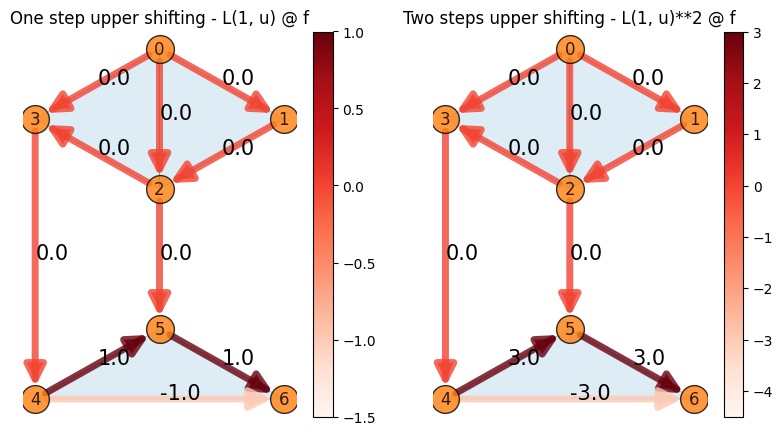

In [9]:
fig = plt.figure(figsize = (15,5))

# one step upper shifting
ax = fig.add_subplot(1, 3, 1)
ax.set_title("One step upper shifting - L(1, u) @ f")
flow = sc.apply_upper_shifting(synthetic_flow, steps=1)
scplot.draw_network(edge_flow=flow, ax=ax)

# two steps upper shifting
ax = fig.add_subplot(1, 3, 2)
ax.set_title("Two steps upper shifting - L(1, u)**2 @ f")
upper_flow = sc.apply_upper_shifting(synthetic_flow, steps=2)
scplot.draw_network(edge_flow=upper_flow, ax=ax)

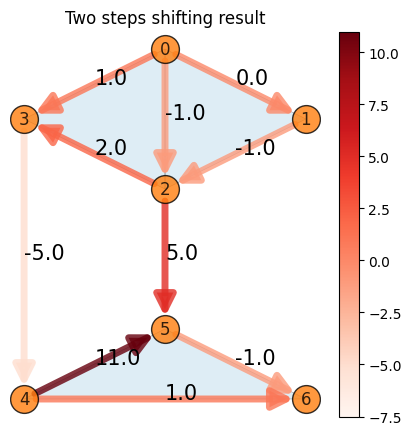

In [10]:
# two step shifting result L1^2 @ f
fig = plt.figure(figsize = (5,5))
ax = fig.add_subplot(1, 1, 1)
ax.set_title("Two steps shifting result")
flow = sc.apply_two_step_shifting(synthetic_flow)
scplot.draw_network(edge_flow=flow, ax=ax)